<a href="https://colab.research.google.com/github/rlphilli/Collaborative-Incentives/blob/main/Finalnotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install hypernetx
! pip install cvxpy

     |████████████████████████████████| 67 kB 2.8 MB/s 


In [2]:
import copy
from collections import Counter
import random

import cvxpy as cvx
import cvxpy as cp 
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx # For visualization
import hypernetx as hnx # For visualization
from scipy.stats import gmean
import pandas as pd
import seaborn as sns

In [3]:
examples = {
    "Sunflower" :    np.array([[1,1,0,0,1],
                  [1,1,1,0,0],
                  [1,1,1,0,0],
                  [1,0,1,1,0],
                  [1,0,1,1,0],
                  [1,0,0,1,1],
                  [1,0,0,1,1],
                  [1,1,0,0,1],
                  [0,0,0,0,1],
                  [0,0,0,0,1],
                  [0,0,0,0,1],
                  [0,0,0,0,1],
                  [0,1,0,0,0],
                  [0,1,0,0,0],
                  [0,1,0,0,0],
                  [0,1,0,0,0],
                  [0,0,1,0,0],
                  [0,0,1,0,0],
                  [0,0,1,0,0],
                  [0,0,1,0,0],
                  [0,0,0,1,0],
                  [0,0,0,1,0],
                  [0,0,0,1,0],
                  [0,0,0,1,0],            
                 ]),
    "Sunflower With No Core": np.array([[1,0,0,1],
                      [1,1,0,0],
                      [1,1,0,0],
                      [0,1,1,0],
                      [0,1,1,0],
                      [0,0,1,1],
                      [0,0,1,1],
                      [1,0,0,1],
                      [0,0,0,1],
                      [0,0,0,1],
                      [0,0,0,1],
                      [0,0,0,1],
                      [1,0,0,0],
                      [1,0,0,0],
                      [1,0,0,0],
                      [1,0,0,0],
                      [0,1,0,0],
                      [0,1,0,0],
                      [0,1,0,0],
                      [0,1,0,0],
                      [0,0,1,0],
                      [0,0,1,0],
                      [0,0,1,0],
                      [0,0,1,0],            
                     ]),
    "Flower and Bud":           np.array([[1,1,0,0,1, 0],
                  [1,1,1,0,0, 0],
                  [1,1,1,0,0, 0],
                  [1,0,1,1,0, 0],
                  [1,0,1,1,0, 0],
                  [1,0,0,1,1, 0],
                  [1,0,0,1,1, 0],
                  [1,1,0,0,1, 0],
                  [0,0,0,0,1, 0],
                  [0,1,0,0,1, 1],
                  [0,0,0,1,1, 1],
                  [0,0,0,0,1, 0],
                  [0,1,0,0,0, 0],
                  [0,1,0,0,1, 1],
                  [0,1,1,0,0, 1],
                  [0,1,0,0,0, 0],
                  [0,1,1,0,0, 1],
                  [0,0,1,0,0, 0],
                  [0,0,1,0,0, 0],
                  [0,0,1,1,0, 1],
                  [0,0,1,1,0, 1],
                  [0,0,0,1,0, 0],
                  [0,0,0,1,0, 0],
                  [0,0,0,1,1, 1],
                 ])
    
}

In [4]:
def gen_params(membership_matrix):
    """A function that describes our membership matrix"""
    (d, K) = np.shape(membership_matrix)
    # The number of points in each distribution
    b = np.sum(membership_matrix, axis = 0)
    b = np.max(b)
    return d,K,b,membership_matrix

## Some visualization functions

In [5]:
def reformat(arr):
    dists = {}
    for i in range(arr.shape[1]):
        membership = []
        for idx, j in enumerate(arr[:,i]):
            if j:
                membership.append(str(idx))
            else:
                pass
        dists[i] = membership
    return dists

def reformat_graph(arr):
    edges = []
    for i in range(arr.shape[0]):
        membership = []
        for idx, j in enumerate(arr[i, :]):
            if j:
                membership.append(str(idx))
            else:
                pass
        for point1 in membership:
            for point2 in membership:
                edges.append(tuple(sorted((point1, point2))))
    return edges

def reformat_graph_weighted(arr):
    edges = []
    for i in range(arr.shape[0]):
        membership = []
        for idx, j in enumerate(arr[i, :]):
            if j:
                membership.append(str(idx))
            else:
                pass
        for point1 in membership:
            for point2 in membership:
                edges.append(tuple(sorted((point1, point2))))
                if point1 == point2:
                    edges.append(tuple(sorted((point1, point2))))
    return edges

In [6]:
def visualize_dist_membership(membership_matrix):
    """Visualize the distributions using hypergraph vis software"""
    H = hnx.Hypergraph(reformat(membership_matrix))
    plt.figure(figsize=(6,6))
    hnx.draw(H)
    
    
def visualize_dist_graph(membership_matrix):
    """Visualize the distributions as spectral graphs"""
    G=nx.Graph()
    for i in range(membership_matrix.shape[1]):
        G.add_node(str(i), label=str(i))
    for e, weight in list(Counter(reformat_graph_weighted(membership_matrix)).items()):
        G.add_edge(*e, weight=weight/2.0)
    nx.draw_spectral(G, with_labels=True)



In [7]:
d,K,b,B = gen_params(examples[  "Sunflower"])

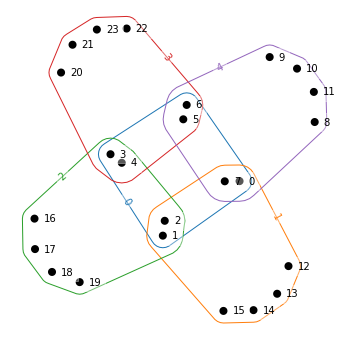

In [8]:
visualize_dist_membership(B)

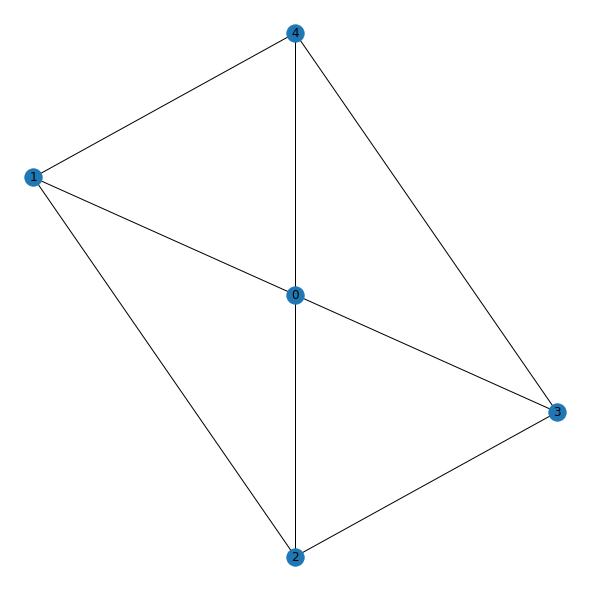

In [9]:
visualize_dist_graph(B)

# Individualized (Pointwise Optimization)

In [10]:
import sklearn
# sklearn.datasets.make_spd_matrix(K)

In [15]:
b = 16
membership_array = np.zeros((int(np.sqrt(b)*np.sqrt(b) + b*(b-np.sqrt(b))), int(b+1)))
membership_array[0:b, 0]  = 1
for i in range(1, b+1):
  # print(i, b)
  chunk = int(i//np.sqrt(b))
  if i%np.sqrt(b) ==0:
    chunk-=1
  print(i, chunk)
  for j in range(chunk*int(np.sqrt(b)), (chunk+1)*int(np.sqrt(b))):
    # print(j,i)
    membership_array[j,i] = 1
  for j in range(b+(i-1)*(b-int(np.sqrt(b))),b+(i)*(b-int(np.sqrt(b))) ):
    membership_array[j,i] = 1


1 0
2 0
3 0
4 0
5 1
6 1
7 1
8 1
9 2
10 2
11 2
12 2
13 3
14 3
15 3
16 3


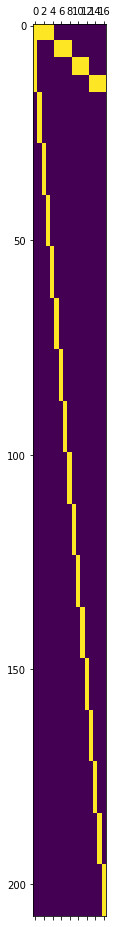

In [16]:
plt.matshow(membership_array)

In [20]:
def optimize_groupwise(membership_matrix, mu, individually_rational=False):
    d,K,b,membership_matrix = gen_params(membership_matrix)
    n = cvx.Variable(K)
    a = np.ones(K)
    B = membership_matrix
    constraints = [B.T@(cvx.exp(cvx.log(1-1.0/b)*B@n))<= mu*a]
    constraints += [n >= np.zeros(K)] 
    if individually_rational:
        x_ir_values, _ = naive_solution(membership_matrix, mu)
        constraints += [ n <= x_ir_values ]
    else:
        pass
    prob = cvx.Problem(cvx.Minimize(cvx.norm(n, 1)),constraints)    
    prob.solve(solver=cvx.SCS, verbose=False, max_iters=2500, eps=0.000000000001)
    return n, prob, mu

In [21]:
# size = sample(range(3, 1000), 1)[0]
# k = sample(range(2, 25), 1)[0]
# b = sample(range(2, int(size/2)), 1)[0]
# mu = sample(range(1, b), 1)[0]/b



size = int(np.sqrt(b)*np.sqrt(b) + b*(b-np.sqrt(b)))
k= b+1
# member/ship_array = np.zeros((int(np.sqrt(b)*np.sqrt(b) + b*(b-np.sqrt(b))), int(b+1)))
mu = 0.5+1/(2*b)

xx = np.array(np.ones(size//2).tolist() + (0.1*np.ones(size-size//2)).tolist())
xx = xx/np.linalg.norm(xx, 1)

for i in range(k):
  for j in np.random.choice(np.array(range(size)), b, replace=False, p=xx):
      membership_array[j, i] = 1
      
membership_array = membership_array[~np.all(membership_array == 0, axis=1)]
size = membership_array.shape[0]


B = membership_array
a = np.ones(k)

n = cvx.Variable(k)

constraints = [B.T@(cvx.exp(cvx.log(1-1.0/b)*B@n))<= mu*a]
print('distribution size is ', b, '  k is ', k, '  universe has size ', size)

constraints += [n >= np.zeros(k)]  
prob = cvx.Problem(cvx.Minimize(cvx.pnorm(n, 1)),constraints)    
prob.solve(solver=cvx.SCS, max_iters=2500, eps=0.000001, verbose=False)

i = 0
thets = np.zeros(k)
while np.min(B.T@np.exp(np.log(1-1.0/b)*B@thets)) > mu:
  mindex = np.argmax(B.T@np.exp(np.log(1-1.0/b)*B@thets))
  thets[mindex] += 1
  i += 1
print('max difference between sampling and protocol  ', np.max(np.abs(n.value-thets)))
n2, p, m = optimize_groupwise(B, mu, individually_rational=False)
print('max difference between linear and protocol  ', np.max(np.abs(n2.value-thets)))
print('max difference between linear and sampling  ', np.max(n2.value-n.value))
print('total difference between linear and sampling  ',np.sum(np.abs(n2.value-n.value)))
print(np.min(n2.value), np.max(n2.value), np.sum(n2.value))
# cov_array = np.zeros((k,k))
# for point in range(size):  
#   for i in range(k):
#     for j in range(k):
#         if membership_array[point, i] and membership_array[point, j]:
#             cov_array[i,j] += 1
# plt.matshow(cov_array)
# plt.show()
print('----------------------')

distribution size is  16   k is  17   universe has size  208
max difference between sampling and protocol   15.697535373925454
max difference between linear and protocol   153.99620070766423
max difference between linear and sampling   138.29866533373877
total difference between linear and sampling   1170.8545832421767
-4.712942838518756e-08 186.99620070766423 1583.1342871292
----------------------


In [ ]:
def optimize_groupwise_fair(membership_matrix, mu, individually_rational=False):
    d,K,b,membership_matrix = gen_params(membership_matrix)
    n = cvx.Variable(K)
    a = np.ones(K)
    B = membership_matrix
    plt.matsh
    constraints = [B.T@(cvx.exp(cvx.log(1-1.0/b)*B@n))<= mu*a]
    constraints += [n >= np.zeros(K)] 

    prob = cvx.Problem(cvx.Minimize(cvx.norm(n, 1)),constraints)    
    prob.solve(solver=cvx.SCS, verbose=False, max_iters=2500, eps=0.000001)
    return n, prob, mu

In [ ]:
from random import sample
mas = []
for jjjj in range(10):
    print(jjjj)
    size = sample(range(3, 1000), 1)[0]
    k = sample(range(2, 25), 1)[0]
    b = sample(range(2, int(size/2)), 1)[0]
    mu = sample(range(1, b), 1)[0]/b

    # size = 400
    # k=98
    # b = 135
    membership_array = np.zeros((size,k))
    
    xx = np.array(np.ones(size//2).tolist() + (0.1*np.ones(size-size//2)).tolist())
    xx = xx/np.linalg.norm(xx, 1)
    
    for i in range(k):
        for j in np.random.choice(np.array(range(size)), b, replace=False, p=xx):
            membership_array[j, i] = 1
            
    membership_array = membership_array[~np.all(membership_array == 0, axis=1)]
    size = membership_array.shape[0]


    B = membership_array
    mas.append(B)
    a = np.ones(k)
   
    n = cvx.Variable(k)

    constraints = [B.T@(cvx.exp(cvx.log(1-1.0/b)*B@n))<= mu*a]
    print('distribution size is ', b, '  k is ', k, '  universe has size ', size)

    constraints += [n >= np.zeros(k)]  
    prob = cvx.Problem(cvx.Minimize(cvx.pnorm(n, 1)),constraints)    
    prob.solve(solver=cvx.SCS, max_iters=2500, eps=0.000001, verbose=False)

    i = 0
    thets = np.zeros(k)
    while np.min(B.T@np.exp(np.log(1-1.0/b)*B@thets)) > mu:
        mindex = np.argmax(B.T@np.exp(np.log(1-1.0/b)*B@thets))
        thets[mindex] += 1
        i += 1
    print('max difference between sampling and protocol  ', np.max(np.abs(n.value-thets)))
    n2, p, m = optimize_groupwise(B, mu, individually_rational=False)
    print('max difference between linear and protocol  ', np.max(np.abs(n2.value-thets)))
    print('max difference between linear and sampling  ', np.max(n2.value-n.value))
    print('total difference between linear and sampling  ',np.sum(np.abs(n2.value-n.value)))
    print(np.min(n2.value), np.max(n2.value), np.sum(n2.value))
    # cov_array = np.zeros((k,k))
    # for point in range(size):  
    #   for i in range(k):
    #     for j in range(k):
    #         if membership_array[point, i] and membership_array[point, j]:
    #             cov_array[i,j] += 1
    # plt.matshow(cov_array)
    # plt.show()
    print('----------------------')

0
distribution size is  76   k is  23   universe has size  558


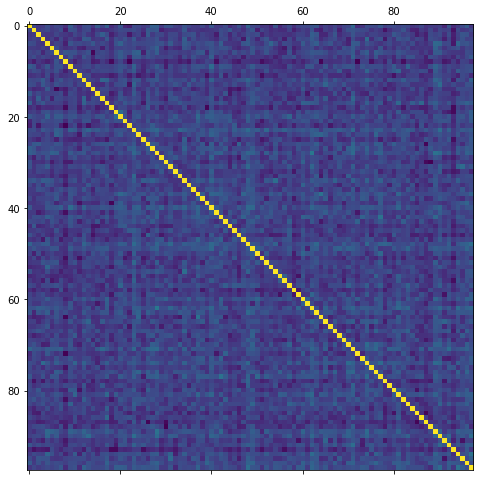

In [ ]:
plt.matshow(cov_array/135)

In [ ]:
x1,x2,x3 = optimize_groupwise(cov_array/135, m, individually_rational=True)

In [ ]:
np.max(np.abs(n.value-thets))

2.610061192322977

In [ ]:
n2.value-x1.value

array([ 7.38634e-04,  2.21348e+01,  7.00079e+01,  3.18680e+01,  7.40402e+00,  3.90856e+01,  5.95488e+01,  1.69584e+02,  1.50790e+02,  1.08788e+01,  6.71052e+00,  1.43082e+02, -1.28265e-04,  1.38016e-03,  1.28953e+02,  1.56758e+02,  3.70579e+01,  1.77529e+01,  1.53255e+02,  1.00524e+02,
        2.20856e-03,  2.54334e+01,  1.40825e+02, -2.98645e+02,  9.03752e+00,  2.02825e+02,  1.70243e+01,  6.94952e-04,  1.03279e-03,  7.76098e+01,  1.25771e+02,  1.50687e+02,  1.19403e+02,  1.13840e+02,  2.75233e-03,  9.97277e+01, -5.09862e-04,  1.42211e-03,  2.25897e-04,  5.37381e+01,
       -7.32821e+01,  5.96027e+01,  4.37699e-04,  6.47166e+01,  8.12579e+01,  1.88518e+01,  1.26780e+02,  2.31317e+00, -7.56203e+01,  1.86261e-03,  8.06048e+01,  1.18827e+02,  3.53037e+01,  1.66712e+01,  1.47194e+01,  1.52428e+02,  8.01444e+01,  2.55882e+01,  1.46656e+02,  1.60764e+02,
        1.74737e+01,  6.03642e+01, -2.64457e-05,  1.64424e-03,  1.13047e+02,  3.95210e-04,  1.36690e+02,  1.42819e+01,  1.08063e+02,  1.508

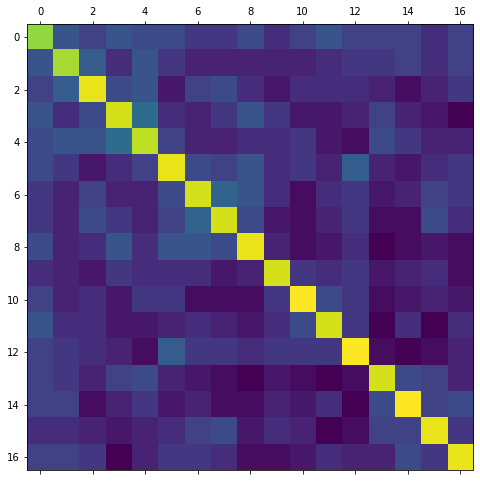

In [ ]:
cov_array = np.zeros((k,k))
for point in range(size):  
  for i in range(k):
    for j in range(k):
        if membership_array[point, i] and membership_array[point, j]:
            cov_array[i,j] += 1
plt.matshow(cov_array)

In [ ]:
#Optimization procedure
B = membership_array
# this is hte individualized version
# mu = .01
a = np.ones(k)
for i in range(np.mean(B, axis=1).__len__()):
    if np.mean(B, axis=1)[i]==0:
        a[i] = 2/mu
n = cvx.Variable(k)

constraints = [B.T@(cvx.exp(cvx.log(1-1.0/b)*B@n))<= mu*a]

constraints += [n >= np.zeros(k)]  
prob = cvx.Problem(cvx.Minimize(cvx.pnorm(n, 1)),constraints)    
prob.solve(solver=cvx.SCS, max_iters=25000, eps=0.00000001, verbose=False)

i = 0
thets = np.zeros(k)
while np.min(B.T@np.exp(np.log(1-1.0/b)*B@thets)) > mu:
    mindex = np.argmax(B.T@np.exp(np.log(1-1.0/b)*B@thets))
    thets[mindex] += 1
    i += 1
np.max(np.abs(n.value-thets))


print("\nThe optimal value for sum is {} when $\mu=${}".format(prob.value, mu))
print("A solution n is")
print(n.value)
print("A dual solution corresponding to the inequality constraints is")
# print(prob.constraints[0].dual_value)
# print("The solution bounds are here")
# print(B.T@(np.exp(np.log(1-1.0/b)*B@n.value)))

NameError: ignored

1.5557136839600965

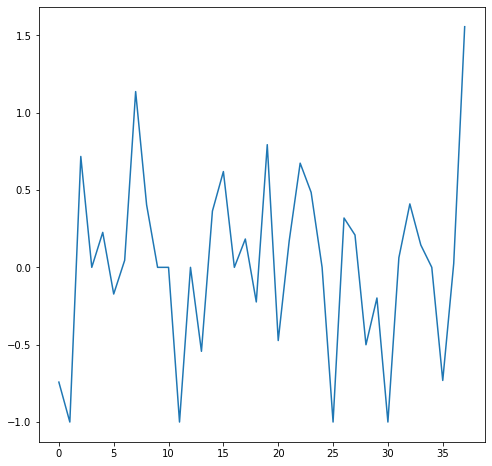

In [ ]:
plt.plot(n.value-thets)
plt.show()

In [ ]:
def gen_params(membership_matrix):
    """A function that describes our membership matrix"""
    (d, K) = np.shape(membership_matrix)
    # The number of points in each distribution
    b = np.sum(membership_matrix, axis = 0)
    b = np.max(b)
    return d,K,b,membership_matrix

In [ ]:
# Initializing parameters
d,K,b,membership_matrix = gen_params(examples[ "Flower and Bud"])

In [ ]:
#Quality of life rounding
np.set_printoptions(linewidth=300, precision=5)

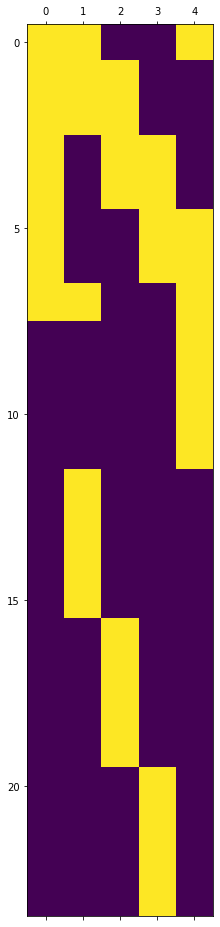

In [ ]:
plt.matshow(B)

In [ ]:
#Optimization procedure
B = membership_matrix
# this is hte individualized version
mu = .01
a = np.ones(K)
for i in range(np.mean(B, axis=1).__len__()):
    if np.mean(B, axis=1)[i]==0:
        a[i] = 2/mu
n = cvx.Variable(K)

constraints = [B.T@(cvx.exp(cvx.log(1-1.0/b)*B@n))<= mu*a]

constraints += [n >= np.zeros(K)]  
prob = cvx.Problem(cvx.Minimize(cvx.pnorm(n, 1)),constraints)    
prob.solve(solver=cvx.SCS, max_iters=25000, eps=0.00000001, verbose=False)
print("\nThe optimal value for sum is {} when $\mu=${}".format(prob.value, mu))
print("A solution n is")
print(n.value)
print("A dual solution corresponding to the inequality constraints is")
print(prob.constraints[0].dual_value)
print("The solution bounds are here")
print(B.T@(np.exp(np.log(1-1.0/b)*B@n.value)))


The optimal value for sum is 201.8874974250602 when $\mu=$0.01
A solution n is
[-5.61607e-11  5.04719e+01  5.04719e+01  5.04719e+01  5.04719e+01 -5.59875e-11]
A dual solution corresponding to the inequality constraints is
[  0.      931.20792 931.20792 931.20792 931.20792   0.     ]
The solution bounds are here
[0.00019 0.01    0.01    0.01    0.01    0.00019]


In [ ]:
(3.44875e+01*4)/0.8

172.43749999999997

In [ ]:
i = 0
thets = np.zeros(K)
while np.min(B.T@np.exp(np.log(1-1.0/b)*B@thets)) > mu:
    mindex = np.argmax(B.T@np.exp(np.log(1-1.0/b)*B@thets))
    thets[mindex] += 1
    i += 1

In [ ]:
thets

array([ 0., 32., 32., 31., 32.,  0.])

In [ ]:
np.exp(np.log(1-1.0/b)*B@thets)

array([0.0011, 0.0011, 0.0011, 1.    , 1.    , 1.    , 1.    , 0.0011, 1.    , 1.    , 1.    , 1.    , 0.0011, 0.0011, 0.0011, 0.0011, 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ])

# Groupwise (Distribution Optimization)

In [ ]:
# Useful helper functions
def reformat_B(membership_matrix):
    """Reformat b to simulate distributions not learning collaboratively"""
    reformatted_matrix = []
    for row in membership_matrix:
        for idx, point, in enumerate(row):
            if point:
                local_arr = np.zeros(membership_matrix.shape[1])
                local_arr[idx] = 1
                reformatted_matrix.append(local_arr)
    return np.array(reformatted_matrix)



def naive_solution(membership_matrix, mu):
    """Calculate the costs for the non-collaborative version"""
    d,K,b,membership_matrix = gen_params(membership_matrix)
    B = reformat_B(membership_matrix)
    a = np.ones(K)
    n = cvx.Variable(K)
    constraints = [B.T@(cvx.exp(cvx.log(1-1.0/b)*B@n))<= mu*a]
    prob = cvx.Problem(cvx.Minimize(cvx.norm(n, 1)),constraints)    
    prob.solve(solver=cvx.SCS, verbose=False, max_iters=2500, eps=0.000000000001)
    return n.value, prob


    

def optimize_groupwise(membership_matrix, mu, individually_rational=False):
    d,K,b,membership_matrix = gen_params(membership_matrix)
    n = cvx.Variable(K)
    a = np.ones(K)
    B = membership_matrix
    constraints = [B.T@(cvx.exp(cvx.log(1-1.0/b)*B@n))<= mu*a]
    constraints += [n >= np.zeros(K)] 
    if individually_rational:
        x_ir_values, _ = naive_solution(membership_matrix, mu)
        constraints += [ n <= x_ir_values ]
    else:
        pass
    prob = cvx.Problem(cvx.Minimize(cvx.norm(n, 1)),constraints)    
    prob.solve(solver=cvx.SCS, verbose=False, max_iters=2500, eps=0.000000000001)
    return n, prob, mu

In [ ]:
def optimize_groupwise(membership_matrix, mu, individually_rational=False):
    d,K,b,membership_matrix = gen_params(membership_matrix)
    n = cvx.Variable(K)
    a = np.ones(K)
    B = membership_matrix
    constraints = [B.T@(cvx.exp(cvx.log(1-1.0/b)*B@n))<= mu*a]
    constraints += [n >= np.zeros(K)] 
    if individually_rational:
        x_ir_values, _ = naive_solution(membership_matrix, mu)
        constraints += [ n <= x_ir_values ]
    else:
        pass
    prob = cvx.Problem(cvx.Minimize(cvx.norm(n, 1)),constraints)    
    prob.solve(solver=cvx.SCS, verbose=False, max_iters=2500, eps=0.000000000001)
    return n, prob, mu

In [ ]:
B2 = reformat_B(B)
n, prob, mu = optimize_groupwise(B2, 7, individually_rational=False)
print(n.value)
print(prob.constraints[0].dual_value)
print(B2.T@(np.exp(np.log(1-1.0/b)*B2@n.value)))

[1.26738 3.38528 3.38528 3.38528 3.38528 1.26738]
[1.35589 1.35589 1.35589 1.35589 1.35589 1.35589]
[7. 7. 7. 7. 7. 7.]


In [ ]:
B2 = reformat_B(B)
n, prob, mu = optimize_groupwise(B2, 6)
print(n.value)
print(prob.constraints[0].dual_value)
print(B2.T@(np.exp(np.log(1-1.0/b)*B2@n.value)))

[2.73045 4.84836 4.84836 4.84836 4.84836 2.73045]
[1.58187 1.58187 1.58187 1.58187 1.58187 1.58187]
[6. 6. 6. 6. 6. 6.]


In [ ]:
# n, prob, mu = optimize_groupwise(examples[ "Sunflower"],6, individually_rational=True)
# d,K,b,B = gen_params(examples["Sunflower"])


n, prob, mu = optimize_groupwise(examples["Flower and Bud"],6, individually_rational=False)
d,K,b,B = gen_params(examples[ "Flower and Bud"])

In [ ]:
print("\nThe optimal value for sum is {} when $\mu=${}".format(prob.value, mu))
print("A solution n is")
print(n.value)
print("A dual solution corresponding to the inequality constraints is")
print(prob.constraints[0].dual_value)
print("The solution bounds are here")
print(B.T@(np.exp(np.log(1-1.0/b)*B@n.value)))


The optimal value for sum is 10.92181717595611 when $\mu=$6
A solution n is
[-2.59974e-11  2.73045e+00  2.73045e+00  2.73045e+00  2.73045e+00 -4.25602e-11]
A dual solution corresponding to the inequality constraints is
[0.      0.90393 0.90393 0.90393 0.90393 0.     ]
The solution bounds are here
[4.5 6.  6.  6.  6.  4.5]


In [ ]:
def get_envy(B,b, n, mu, with_idx=False):
    """This function takes the membership matrix, number of points in each dist, an allocation, and a mu 
    value to determine if any point envies any other"""
    envies = []
    idxs = []
    # get all plausible pairs
    swap_pairs = [] 
    for i in range(len(n)):
        for j in range(len(n)):
            if n[i] - n[j] > n[i]/1000.0 and i!=j:
                # I might want to swap with J
                swap_pairs.append((i,j))
    max_envies = {i:0 for i in range(len(n))}
    for i,j in swap_pairs:
        n_fake = copy.deepcopy(n)      
        if False: 
            pass # They wouldn't do this anyway
            return 'no envy'
        else:
            
            n_fake[i] = n[j]
            n_fake[j] = n[i]
            new_vals = B.T@(np.exp(np.log(1-1.0/b)*B@n_fake))
            if any(new_vals > (mu)) and not (new_vals > mu)[i]:
                    print(i,j)
                    print(n[i],n[j])
                    print(new_vals)
            if any(new_vals > (mu)) and not (new_vals > mu)[i]:
                print('\n\n')
                print('current alloc', n)
                print("But {} envies {}".format(i,j))
                print('proposed', n_fake)
                print('proposed constraint vals', new_vals)
                dissatisfaction_vect = new_vals > mu

                # They are satisfied with the swap
                envies.append(np.max(new_vals)/mu)
                if with_idx:
                    idxs.append(([idx for idx, l in enumerate(dissatisfaction_vect) if l], (i,j)))
                    print(new_vals)
    if with_idx:
        return envies, idxs
    return envies

In [ ]:
get_envy(B,b, n.value, 6)

0 5
-2.5997440241851393e-11 -4.256019046311926e-11
[4.5 6.  6.  6.  6.  4.5]



current alloc [-2.59974e-11  2.73045e+00  2.73045e+00  2.73045e+00  2.73045e+00 -4.25602e-11]
But 0 envies 5
proposed [-4.25602e-11  2.73045e+00  2.73045e+00  2.73045e+00  2.73045e+00 -2.59974e-11]
proposed constraint vals [4.5 6.  6.  6.  6.  4.5]


[1.0000000004391263]

In [ ]:
import numpy as np
# import cvxopt as cvx
import cvxpy as cp


In [ ]:
# from scipy import linalg, stats, random
from scipy.sparse import random


k = 5
from scipy.sparse import random
A=random(k,k, density=.6).todense()
B = np.dot(A,A.transpose())

In [ ]:
Q = np.zeros((16, k))
for i in range(16):
  for j in range(k):
    if np.random.rand() <= 0.8:
        Q[i, j]  = 1

In [ ]:
B = np.corrcoef(Q.T)

In [ ]:
B = B/np.max(B)
np.fill_diagonal(B, 1)

In [ ]:
k

5

In [ ]:
theta = np.array([2, 2,2,2,2])
theta2 = np.array([0, 2,2,2,2])

In [ ]:
mus = np.ones(k)*4


X = cp.Variable((k,k), symmetric=True)
constraints = [X >= 0]
# constraints += [X << 1.001]
constraints += [cp.sum(cp.diag(X)) == 5]
constraints += [X.T@theta >= mus]
constraints += [cp.quad_form(theta2, X) - mus@theta <= 0]


prob=cp.Problem(cp.Minimize(cp.sum(X)), constraints)
unconstrained_solutions = prob.solve()
print('Unconstrained solution has value {}'.format(unconstrained_solutions))
print(X.value @ theta)
print(X.value)

X = cp.Variable((k,k), symmetric=True)
constraints = [X >= 0]
# constraints += [X << 1]
constraints += [cp.sum(cp.diag(X)) == 5]
constraints += [X.T@theta >= mus]
constraints += [cp.quad_form(theta, X) - mus@theta <= 0]

prob=cp.Problem(cp.Minimize(cp.sum(X)), constraints)
unconstrained_solutions = prob.solve()
print('Constrained solution has value {}'.format(unconstrained_solutions))
print(X.value @ theta)
print(X.value)

Unconstrained solution has value 9.999999997907329
[4. 4. 4. 4. 4.]
[[1.04942 0.23764 0.23764 0.23764 0.23764]
 [0.23764 0.98764 0.25824 0.25824 0.25824]
 [0.23764 0.25824 0.98764 0.25824 0.25824]
 [0.23764 0.25824 0.25824 0.98764 0.25824]
 [0.23764 0.25824 0.25824 0.25824 0.98764]]
Constrained solution has value 9.999999999943086
[4. 4. 4. 4. 4.]
[[1.   0.25 0.25 0.25 0.25]
 [0.25 1.   0.25 0.25 0.25]
 [0.25 0.25 1.   0.25 0.25]
 [0.25 0.25 0.25 1.   0.25]
 [0.25 0.25 0.25 0.25 1.  ]]


In [ ]:
X.value @ theta

array([4., 4., 4., 4., 4.])

In [ ]:
np.linalg.norm(X.value)

2.4999999999943103

In [ ]:
X.value

array([[1.  , 0.25, 0.25, 0.25, 0.25],
       [0.25, 1.  , 0.25, 0.25, 0.25],
       [0.25, 0.25, 1.  , 0.25, 0.25],
       [0.25, 0.25, 0.25, 1.  , 0.25],
       [0.25, 0.25, 0.25, 0.25, 1.  ]])

In [ ]:
mus = np.ones(k)*4


X = cp.Variable((k,k), symmetric=True)
constraints = [X >= 0]
# constraints += [X << 1]
constraints += [cp.sum(cp.diag(X)) == 5]
constraints += [X.T@theta >= mus]
constraints += [cp.quad_form(theta, X) - mus@theta <= 0]

prob=cp.Problem(cp.Minimize(cp.sum(X)), constraints)
unconstrained_solutions = prob.solve()
print('Constrained solution has value {}'.format(unconstrained_solutions))

Constrained solution has value 9.999999999943086
